# Лабораторная работа No1

Данные: датасет leetcode (https://www.kaggle.com/datasets/jaydeepagravat94583/leetcode/data).

## Задание 0

Предобработайте данные: из нужных колонок удалите ряды с пустыми ячейками, разделите выборку на тренировочное и тестовое множество, векторизуйте тексты, закодируйте (если это требуется) зависимую переменную.

(1 балл: 0.5 за предобработку для задачи 1, 0.5 за предобработку для задачи 2)

## Задание 1

Предскажите сложность (difficulty) по тексту задания (problem_description). Оцените качество предсказаний.

(3 балла: 2 за моделирование, 1 за оценку)

**Предобработайте данные**

1. из нужных колонок удалите ряды с пустыми ячейками

In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
df = pd.read_csv("leetcode.csv")

In [34]:
data = df.dropna(subset=["problem_description", "difficulty", 'acceptance'])

In [35]:
data.head(3)

,id,page_number,is_premium,title,problem_description,topic_tags,difficulty,similar_questions,no_similar_questions,acceptance,accepted,submission,solution,discussion_count,likes,dislikes,problem_URL,solution_URL
0,1,1,False,1. Two Sum,Given an array of integers nums and an integer...,"'Array', 'Hash Table'",Easy,"[""'3Sum'"", ""'4Sum'"", ""'Two Sum II - Input Arra...",21.0,51.0,11300000.0,22100000.0,26800.0,638.0,52700.0,1700.0,https://leetcode.com/problems/two-sum,https://leetcode.com/problems/two-sum/solution
1,2,1,False,2. Add Two Numbers,You are given two non-empty linked lists repre...,"'Linked List', 'Math', 'Recursion'",Medium,"[""'Multiply Strings'"", ""'Add Binary'"", ""'Sum o...",8.0,41.5,4000000.0,9700000.0,15700.0,428.0,28900.0,5600.0,https://leetcode.com/problems/add-two-numbers,https://leetcode.com/problems/add-two-numbers/...
2,3,1,False,3. Longest Substring Without Repeating Characters,"Given a string s, find the length of the longe...","'Hash Table', 'String', 'Sliding Window'",Medium,"[""'Longest Substring with At Most Two Distinct...",9.0,34.1,5100000.0,14900000.0,18100.0,237.0,37700.0,1700.0,https://leetcode.com/problems/longest-substrin...,https://leetcode.com/problems/longest-substrin...


2. разделите выборку на тренировочное и тестовое множество

In [36]:
x = data["problem_description"]
y = data['difficulty']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    stratify=data['difficulty'],
                                                    test_size=0.2
                                                    )

3. векторизуйте тексты

In [37]:
tfidf = TfidfVectorizer()
tfidf.fit(x_train)

X_train_vec = tfidf.transform(x_train)
X_test_vec = tfidf.transform(x_test)

4. закодируйте (если это требуется) зависимую переменную.

In [38]:
le_ = LabelEncoder()

le_.fit(y_train)
y_train_enc = le_.transform(y_train)
y_test_enc = le_.transform(y_test)

In [39]:
le_.classes_

array(['Easy', 'Hard', 'Medium'], dtype=object)

**Предскажите сложность (difficulty) по тексту задания (problem_description)**

In [40]:
logreg = LogisticRegression(multi_class='ovr', class_weight='balanced')
logreg.fit(X_train_vec, y_train_enc)
clf_preds = logreg.predict(X_test_vec)

print(classification_report(y_test_enc, clf_preds, target_names=le_.classes_))

              precision    recall  f1-score   support

        Easy       0.50      0.59      0.54       118
        Hard       0.30      0.35      0.33        93
      Medium       0.54      0.45      0.49       221

    accuracy                           0.47       432
   macro avg       0.45      0.47      0.45       432
weighted avg       0.48      0.47      0.47       432



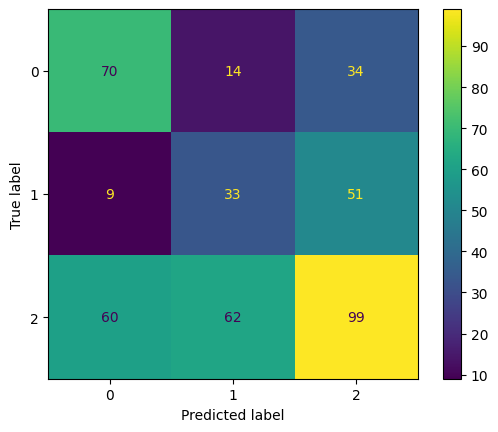

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_enc, clf_preds)

In [ ]:
# pd.Series(y_train).value_counts(normalize=True)

Medium    0.504051
Easy      0.282986
Hard      0.212963
Name: proportion, dtype: float64

**Доп задание: другая модель, анализ**

In [42]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Easy       0.55      0.36      0.43       118
        Hard       0.29      0.06      0.11        93
      Medium       0.53      0.80      0.64       221

    accuracy                           0.52       432
   macro avg       0.46      0.41      0.39       432
weighted avg       0.48      0.52      0.47       432



**Доп Задание: анализ выдачи модели**

                  precision    recall  f1-score   support
        Easy       0.63      0.42      0.50       117
        Hard       0.44      0.13      0.20        94
      Medium       0.56      0.83      0.67       221

    accuracy                           0.56       432
   macro avg       0.54      0.46      0.46       432

weighted avg       0.55      0.56      0.52       432


- Для категории Medium точность (precision) составляет 56%: из всех задач, которые модель предсказала как Medium, только 56% действительно являются таковыми. Полнота (accuracy) составляет 83%, что означает, что модель смогла корректно предсказать 83% всех истинных положительных случаев из общего числа таких случаев в тестовом наборе данных (то же, только подставив другие числа, можно сказать и про другие категории)

- Общая точность модели составляет 0.56, что означает, что модель правильно классифицировала около 56% задач в тестовом наборе данных

- F1-score показывает достаточное сбалансированное соотношение между точностью и полнотой для  классов Easy и Medium, но низкое для Hard
- В целом модель имеет тенденцию к лучшему обнаружению и классификации задач сложности Medium, но  склонна к ошибкам при предсказании задач категорий Easy и Hard.


**Доп задание: другая модель, анализ**

Random Forest

In [43]:
randfor = RandomForestClassifier(random_state=42, n_estimators=1000)
randfor.fit(X_train_vec, y_train)

y_pred = randfor.predict(X_test_vec)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Easy       0.67      0.31      0.42       118
        Hard       0.50      0.01      0.02        93
      Medium       0.54      0.92      0.68       221

    accuracy                           0.56       432
   macro avg       0.57      0.41      0.37       432
weighted avg       0.57      0.56      0.47       432



                precision  recall    f1-score   support

        Easy       0.81      0.36      0.50       119
        Hard       0.50      0.01      0.02        95
      Medium       0.55      0.95      0.70       218

    accuracy                           0.58       432
   
   macro avg       0.62      0.44      0.41       432

weighted avg       0.61      0.58      0.49       432


- Для категории Medium точность (precision) составляет 55%: из всех задач, которые модель предсказала как Easy, только 55% действительно являются таковыми. Полнота (accuracy) составляет 95%, что означает, что модель смогла корректно предсказать 95% всех истинных положительных случаев из общего числа таких случаев в тестовом наборе данных (то же, только с другими числами можно сказать и про другие категории)

-
Mодель показывает хорошую точность и полноту для категории Medium, но плохо справляется с категориями Easy и Hard. Это может свидетельствовать о несбалансированности данных или неэффективности этого алгоритма классификации для некоторых категорий.

# Задание 3:

Хотя бы для одной из задач 1 или 2 выполните кросс-валидацию и подбор гиперпараметров. Не обязательно делать и то и другое для одной и той же задачи: допустим, вы можете выполнить cross_validate для задачи 1 и GridSearchCV для задачи 2.

(2 балла: 1 за кросс-валидацию, 1 за поиск гиперпараметров)

**Кросс-валидация для задания 1**

In [44]:
clf_for_cross_val = LogisticRegression(multi_class='ovr', class_weight='balanced')
scoring = {'f1': 'f1_weighted'}
cv_results = cross_validate(clf_for_cross_val,
                            X_train_vec,
                            y_train_enc,
                            cv=5,
                            scoring=scoring)

In [45]:
cv_results

{'fit_time': array([0.50580716, 0.75032663, 0.53622437, 1.07905507, 0.40838361]),
 'score_time': array([0.00925922, 0.00296283, 0.01081324, 0.01424384, 0.00398612]),
 'test_f1': array([0.48797309, 0.47942331, 0.523095  , 0.45664783, 0.53492102])}

# Задание 2

Предскажите процент принятых решений (acceptance) по тексту задания (problem_description).

In [46]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(data['problem_description'],
                                                                    data['acceptance'],
                                                                    test_size=0.2)

In [47]:
count = CountVectorizer()
count.fit(X_train_reg)
X_train_reg_trandformed = count.transform(X_train_reg)
X_test_reg_trandformed = count.transform(X_test_reg)

In [48]:
linear = LinearRegression()
linear.fit(X_train_reg_trandformed, y_train_reg)
linear_preds = linear.predict(X_test_reg_trandformed)

In [49]:
def get_scores(y_test, y_pred):
    print('R squared: ', r2_score(y_test, y_pred))
    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('MAE: ', mean_absolute_error(y_test, y_pred))

get_scores(y_test_reg, linear_preds)

R squared:  -3.6325324155191474
MSE:  1245.4044701649404
MAE:  26.168427520640538


In [50]:
ridge = Ridge()
ridge.fit(X_train_reg_trandformed, y_train_reg)
ridge_preds = ridge.predict(X_test_reg_trandformed)
get_scores(y_test_reg, ridge_preds)

R squared:  -1.1134916615246566
MSE:  568.1885687623756
MAE:  18.524561184186044


In [51]:
lasso = Lasso()
lasso.fit(X_train_reg_trandformed, y_train_reg)
lasso_preds = lasso.predict(X_test_reg_trandformed)
get_scores(y_test_reg, lasso_preds)

R squared:  0.12954224452271967
MSE:  234.01282117950566
MAE:  12.662208152044231


# Задание 3

**Grid-Search** для задания 2

In [52]:
param_grid = {'alpha': np.arange(0.1, 2, 0.2)}
np.arange(0.1, 2, 0.2)
lasso_for_gridsearch = Lasso()
gs = GridSearchCV(lasso_for_gridsearch, param_grid)
gs.fit(X_train_reg_trandformed, y_train_reg)
gs.cv_results_
gs.best_params_
preds_gs = gs.predict(X_test_reg_trandformed)
get_scores(y_test_reg, preds_gs)


R squared:  0.18761715180906013
MSE:  218.40003261130792
MAE:  12.141707922296595
